In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fp = '../data/full_data.csv'

In [3]:
musics = pd.read_csv(fp).iloc[:, 1:].sort_values(by = 'year')

In [4]:
musics.head()

,album,artist,id,title,year,file,mfcc_0,mfcc_1,mfcc_2,mfcc_3,...,bandwidth,centroid,rolloff,acousticness,danceability,energy,loudness,speechiness,tempo,valence
0,The Sugarhill Gang,The Sugarhill Gang,1FnxNtKli7rcB9IU4J8MEg,Rapper's Delight,1980,./data/Rapper's Delight.mp3,1.890811e-08,-3.804202e-07,-2.639254e-07,-6.431760e-08,...,2932.269422,3271.149826,6835.888420,0.2200,0.905,0.692,-14.143,0.199,111.292,0.943
1,Kurtis Blow,Kurtis Blow,5TvcggVu3s2P1fMAS8BupX,The Breaks,1980,./data/The Breaks.mp3,1.057499e-07,6.933380e-08,-1.520881e-07,-3.618482e-07,...,2574.581462,2369.193568,5234.249962,0.0987,0.910,0.576,-13.256,0.109,112.877,0.907
2,8th Wonder,The Sugarhill Gang,4UCkX8nrBlpxjrrEqtb46a,Apache,1981,./data/Apache.mp3,-1.414954e-07,1.606020e-08,-4.006917e-08,-1.196751e-08,...,2535.741911,2907.329677,5791.839284,0.3320,0.827,0.928,-7.266,0.133,115.023,0.261
3,8th Wonder,The Sugarhill Gang,6m0wOLtrzaNwMofVVJTJqs,8th Wonder,1981,./data/8th Wonder.mp3,3.262833e-07,-1.683564e-08,-7.625627e-08,-1.203945e-07,...,2537.327894,3135.834750,5981.420399,0.2980,0.871,0.937,-8.536,0.195,106.494,0.675
4,Planet Rock,Afrika Bambaataa,3uy0jtkM8QYVTsBazkli1x,Planet Rock,1982,./data/Planet Rock.mp3,-8.671024e-08,7.907207e-08,-5.019072e-08,-2.139210e-08,...,2803.020324,3522.282559,6855.145450,0.0110,0.915,0.807,-9.636,0.130,127.350,0.708


### Select features.

In [5]:
music_features = musics.drop(['artist', 'id', 'title', 'album', 'file', 'year'],axis = 1)
music_features.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,bandwidth,centroid,rolloff,acousticness,danceability,energy,loudness,speechiness,tempo,valence
0,1.890811e-08,-3.804202e-07,-2.639254e-07,-6.431760e-08,-1.080152e-07,-1.781040e-08,-4.801459e-08,7.261296e-08,1.197785e-07,8.293486e-08,...,2932.269422,3271.149826,6835.888420,0.2200,0.905,0.692,-14.143,0.199,111.292,0.943
1,1.057499e-07,6.933380e-08,-1.520881e-07,-3.618482e-07,6.409503e-08,1.053390e-07,1.140600e-07,1.873398e-07,-1.244921e-07,1.064396e-07,...,2574.581462,2369.193568,5234.249962,0.0987,0.910,0.576,-13.256,0.109,112.877,0.907
2,-1.414954e-07,1.606020e-08,-4.006917e-08,-1.196751e-08,2.808909e-07,-8.390938e-08,2.251238e-07,-1.769062e-08,-3.454570e-08,1.500061e-07,...,2535.741911,2907.329677,5791.839284,0.3320,0.827,0.928,-7.266,0.133,115.023,0.261
3,3.262833e-07,-1.683564e-08,-7.625627e-08,-1.203945e-07,-3.800182e-08,8.758165e-09,1.395069e-08,-2.490945e-07,-9.116444e-08,-1.617007e-07,...,2537.327894,3135.834750,5981.420399,0.2980,0.871,0.937,-8.536,0.195,106.494,0.675
4,-8.671024e-08,7.907207e-08,-5.019072e-08,-2.139210e-08,-3.428748e-08,-3.504222e-08,-1.334006e-08,3.385281e-07,-5.309370e-08,-7.372620e-08,...,2803.020324,3522.282559,6855.145450,0.0110,0.915,0.807,-9.636,0.130,127.350,0.708


### Conduct PCA on the features to reduce them to one or two dimensions.

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
pca_1 = PCA(n_components = 1)

In [8]:
reduced_dim = pca.fit_transform(music_features)
reduced_one = pca_1.fit_transform(music_features)

In [9]:
music_reduced = pd.DataFrame(reduced_dim)
music_reduced.columns = [f'pca_feature{i + 1}' for i in range(2)]
music_reduced['name'] = musics['title']
music_reduced['year'] = musics['year']

music_pca_one = pd.DataFrame(reduced_one)
music_pca_one.columns = ['pca']
music_pca_one['name'] = musics['title']
music_pca_one['year'] = musics['year']

In [10]:
music_reduced.head()

,pca_feature1,pca_feature2,name,year
0,-1851.562728,-64.578175,Rapper's Delight,1980
1,19.071709,-150.542340,The Breaks,1980
2,-696.739576,147.925563,Apache,1981
3,-963.600122,275.773172,8th Wonder,1981
4,-1952.208902,200.026702,Planet Rock,1982


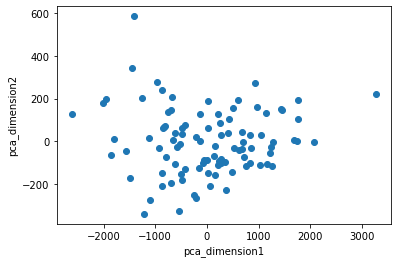

In [11]:
plt.xlabel('pca_dimension1')
plt.ylabel('pca_dimension2')
plt.scatter(x=music_reduced['pca_feature1'], y=music_reduced['pca_feature2'])

### Attempt to cluster the data based on two-dimensional PCA.

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=4)

In [14]:
kmeans.fit(music_reduced[[f'pca_feature{i + 1}' for i in range(2)]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
music_reduced['group_kmeans'] = kmeans.labels_

In [16]:
music_reduced.head()

,pca_feature1,pca_feature2,name,year,group_kmeans
0,-1851.562728,-64.578175,Rapper's Delight,1980,3
1,19.071709,-150.542340,The Breaks,1980,0
2,-696.739576,147.925563,Apache,1981,1
3,-963.600122,275.773172,8th Wonder,1981,1
4,-1952.208902,200.026702,Planet Rock,1982,3


In [17]:
grouped = music_reduced.groupby('group_kmeans')[[f'pca_feature{i + 1}' for i in range(2)]]

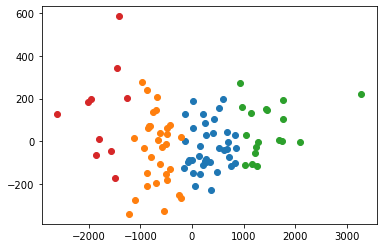

In [18]:
for name, group in grouped:
    plt.plot(group["pca_feature1"], group["pca_feature2"], marker="o", linestyle="", label=name)

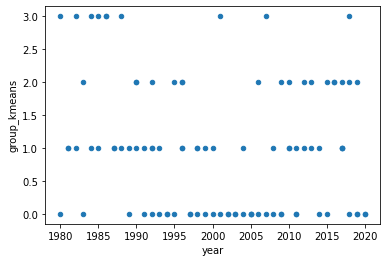

In [19]:
music_reduced[['year', 'group_kmeans']].plot.scatter(x = 'year', y = 'group_kmeans')

#### As you can see, the clusters do not seem very distinct, nor do they vary by year.

### Plotting two-dimensional results in bokeh

In [20]:
music_reduced['artist'] = musics['artist']

from bokeh.plotting import ColumnDataSource, figure, output_notebook, show, output_file

output_notebook()

source = ColumnDataSource(data=dict(
    x=list(music_reduced['pca_feature1']),
    y=list(music_reduced['pca_feature2']),
    title=list(music_reduced['name']),
    artist=list(music_reduced['artist']),
    year=list(music_reduced['year'])
))

TOOLTIPS = [
    ("(x,y)", "($x, $y)"),
    ("title", "@title"),
    ("artist", "@artist"),
    ("year", "@year")
]

p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS,
           title="2-D PCA Results")

p.circle('x', 'y', size=5, source=source)

show(p)

Loading BokehJS ...

### Plotting one-dimensional PCA results against year.

In [23]:
music_pca_one['artist'] = musics['artist']

output_notebook()
output_file('pca_year.html')

source = ColumnDataSource(data=dict(
    x=list(music_pca_one['year']),
    y=list(music_pca_one['pca']),
    title=list(music_pca_one['name']),
    artist=list(music_pca_one['artist']),
    year=list(music_pca_one['year'])
))

TOOLTIPS = [
    ("(x,y)", "($x, $y)"),
    ("title", "@title"),
    ("artist", "@artist"),
    ("year", "@year")
]

p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS,
           title="1-D PCA vs. Year")

p.circle('x', 'y', size=5, source=source)

show(p)

Loading BokehJS ...

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X = music_pca_one[['year']], y = music_pca_one[['pca']])
lr.score(X = music_pca_one[['year']], y = music_pca_one[['pca']])

0.1283841220393056

####We do see that there is a slight positive association between time and the PCA feature, although the correlation is relatively weak and we don't have much of an idea of what it means.